# Topic 10 Geometric Matrix Operation

The exercise contains two sets of problems. The first set tests your algorithmic capability in terms of matrix (which has simple syntax yet difficult algorithm). The second set tests your ability to read complex syntax and implement simple numpy code. The issue at hand might be challenging and esoteric but following the instruction will ensure a success at the very end and you will learn a complex algorithm.

**Exercise 0** (3 points) Find the perimeter

Let's start off with a relatively simpler example. You are given a map in form of a two-dimensional integer grid where 1 represents land and 0 represents water. Grid cells are connected horizontally/vertically (not diagonally). The grid is completely surrounded by water, and there is exactly one island (i.e., one or more connected land cells).

The island doesn't have "lakes" (water inside that isn't connected to the water around the island). One cell is a square with side length 1. The grid is rectangular, width and height don't exceed 100. Determine the perimeter of the island.

Example:
Input:
[[0,1,0,0],
 [1,1,1,0],
 [0,1,0,0],
 [1,1,0,0]]

Output: 16
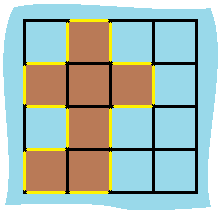

In [1]:
import numpy as np
grid=np.array([[0,1,0,0], [1,1,1,0], [0,1,0,0], [1,1,0,0]])

A=np.pad(grid,pad_width=1, mode='constant',constant_values=0)
shore=0
for (r,c), v in np.ndenumerate(A):   
    if v==1:
        if A[r,c-1]==0:
            shore+=1
        if A[r,c+1]==0:
            shore+=1
        if A[r-1,c]==0:
            shore+=1
        if A[r+1,c]==0:
            shore+=1
print(shore)            

16


In [2]:
def islandPerimeter(grid):    
    A=np.pad(grid,pad_width=1, mode='constant',constant_values=0)
    shore=0
    for (r,c), v in np.ndenumerate(A):   
        if v==1:
            if A[r,c-1]==0:
                shore+=1
            if A[r,c+1]==0:
                shore+=1
            if A[r-1,c]==0:
                shore+=1
            if A[r+1,c]==0:
                shore+=1
    return shore

In [3]:
# Test cell: `test1`
test1 = [[0,1,0,0], [1,1,1,0], [0,1,0,0], [1,1,0,0]]
assert islandPerimeter(test1) == 16, 'The value of the output is incorrect'

test2 = [[1,1,0,0],[1,1,0,0],[1,1,1,1]]

assert islandPerimeter(test2) == 14,'The value of the output is incorrect'
test3 = [[1,1,0,0], [1,0,0,0],[0,0,0,0],[0,0,1,0]]

assert islandPerimeter(test3) == 12, 'The value of the output is incorrect'

print("\n(Passed!)")


(Passed!)


**Exercise 1**

This problem is concerned with computing the minimum volume covering ellipsoid (MVCE) in 2-dimensional space. Suppose we have a set of points stored in matrix P, we want to find the “smallest” ellipsoid that contains all data points. 
An example of the ellipse is shown below: 
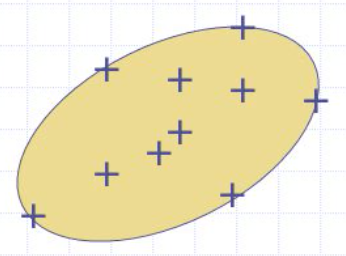

In this problem, we use Khachiyan Algorithm for computation. An ellipse E centered at c can be described with shape matrix A:

\begin{equation*}
\left(p_{i}-c\right)^T A \left(p_{i}-c\right) \leq 1
\end{equation*}

\begin{equation*}
A \geq 0
\end{equation*}
Where $ p_{i}$ is the i-th column of the matrix P. 
The volume of above ellipsoid is proportional to the logarithmic determinant of inverse A, therefore, the object of this problem is to find the matrix A to minimize Vol(E):
\begin{equation*}
\text{min } log\left(det A^{-1}\right)
\end{equation*}    

**Acquisition of Matrix A is already coded for you.** The optimal value depends on the set up of threshold of 'tolerance'. For convenience, we set the tolerance = 0.001. 

** In exercise 1 and 2, you only need to write one or two lines of codes using the equations below.** Here,

P : (N x 2) dimensional matrix containing N points in 2-dimensional space.
tolerance : error in the solution with respect to the optimal value.

c(center) : 2-dimensional vector containing the center of the ellipse.

**c = P.transpose * u (here, u is also coded for you, it is a N x 1 vector to assist locating the center )** 

A : This matrix contains all the information regarding the shape of the ellipsoid. To get the radii and orientation of the ellipsoid take the Singular Value Decomposition ( svd function in matlab) of the output matrix A: 

**U, s, rotation = svd(A)**

the radii are given by:

**radii = 1/sqrt(s)**



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from numpy import linalg
import time

In [5]:
random.seed(10)
P = np.reshape([random.random()*10 for i in range(20)],(10,2)) #Let's start off by generating an matrix with 20 entries
(N, d) = np.shape(P) #We use N and d to extract the row and column of the matrix
d = float(d)
tolerance = 0.001
# Q will be our working array
Q = np.vstack([np.copy(P.T), np.ones(N)]) 
QT = Q.T
# initializations
err = 1.0 + tolerance
u = (1.0 / N) * np.ones(N)
# Khachiyan Algorithm
while err > tolerance:
    V = np.dot(Q, np.dot(np.diag(u), QT))
    M = np.diag(np.dot(QT , np.dot(linalg.inv(V), Q)))    # M the diagonal vector of an NxN matrix
    j = np.argmax(M)
    maximum = M[j]
    step_size = (maximum - d - 1.0) / ((d + 1.0) * (maximum - 1.0))
    new_u = (1.0 - step_size) * u
    new_u[j] += step_size
    err = np.linalg.norm(new_u - u)
    u = new_u

**Exercise 1** (2 points) In order to find the center of the ellipse, you need to find the dot product between **P_transpose** and u. (Hint: use the built-in function in numpy for computation)

In [6]:
P.T.dot(u)

array([6.321053  , 5.10618675])

In [7]:
def find_center(P_transpose, u,):
    return P_transpose.dot(u)

In [8]:
## Test cell: `test_center`
t0_test = time.time()
find_center(P.T, u)
diff = np.subtract(find_center(P.T, u), [6.321053,5.10618675])
assert (diff<=1e-8).all(), 'Your solution does not have the correct center value'
t1_test = time.time()
time_naive = t1_test - t0_test + 1e-10
required_time = 0.03132821129394531
ratio = time_naive/required_time
assert required_time/time_naive >10, 'Your run time is {}, which is {}x faster. We need the solution to be 10 times faster '.format(time_naive,ratio)
print('\n(Passed!)')


(Passed!)


**Exercise 2** (3 points) Now that we have figured out the center, let's investigate on how to find the radius of the ellipse since the center and the radius will define an ellipse. First we have to perform a rotation of the matrix and again, you do not have to comprehend this part of the algorithm just make sure you keep track of the variables. 


In [9]:
 # the A matrix for the ellipse
center = find_center(P.T, u)
A = linalg.inv(
               np.dot(P.T, np.dot(np.diag(u), P)) - 
               np.array([[a * b for b in center] for a in center])
               ) / d
# Get the values we'd like to return
U, s, rotation = linalg.svd(A)

The formula for the radius is 1/square root of s. Please use corresponding method to calculate the radius. 

In [10]:
import math
1/np.sqrt(s)

array([3.35112615, 5.95371236])

In [11]:
def find_radius(s):
    return 1/np.sqrt(s)


In [12]:
# Test cell: `test_radius`
t2_test = time.time()
find_radius(s)
radius_diff = np.subtract(find_radius(s),[3.35112615, 5.95371236])
assert (radius_diff<=1e-8).all(), 'Your solution does not have the correct center value'
t3_test = time.time()
time_naive_radius = t3_test - t2_test + 1e-10
radius_required_time = 0.03132821129394531
radius_ratio = radius_required_time/time_naive_radius
assert radius_ratio >10, 'Your run time is {}, which is {}x faster. We need the solution to be 10 times faster '.format(time_naive,ratio)
print('\n(Passed!)')


(Passed!)


**Visualization** (ungraded)

(1.5089006560036151, 11.13320534328616, -0.908208936879867, 11.120582435558351)

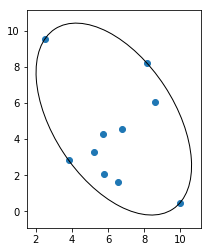

In [13]:
ra = find_radius(s)[0];
rb = find_radius(s)[1];
ang = np.arctan(U[1, 0] / U[0, 0])
fig = plt.figure()
ax = fig.add_subplot(111, aspect = 'equal')

ax.scatter(P.T[0, :], P.T[1, :])
ax.add_patch(
patches.Ellipse(center, 2*ra, 2 *rb, np.rad2deg(ang), fill=False)
)
ax.axis('scaled')

**Fin!** You've reached the end of this problem. Don't forget to restart the kernel and run the entire notebook from top-to-bottom 
to make sure you did everything correctly. If that is working, try submitting this problem. (Recall that you must submit and pass the autograder to get credit for your work!)